In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

In [2]:
training = np.load('tutorial_1_data/logistic_regression_training.npy')
X_Train = training[:, :2]
Y_Train = training[:, 2].reshape(-1, 1)  # makes it a vector

validation = np.load('tutorial_1_data/logistic_regression_validation.npy')
X_Val = validation[:, :2]
Y_Val = validation[:, 2].reshape(-1, 1)  # makes it a vector

testing = np.load('tutorial_1_data/logistic_regression_testing.npy')
X_Test = testing[:, :2]
Y_Test = testing[:, 2].reshape(-1, 1)  # makes it a vector

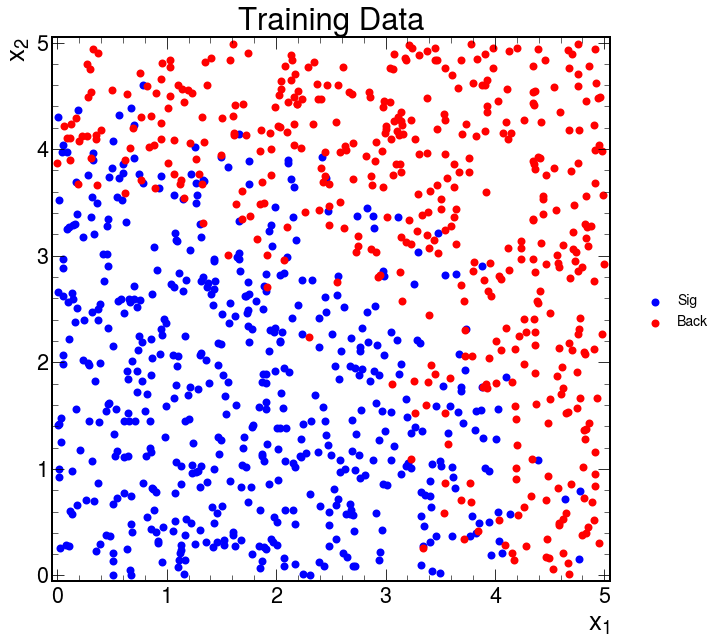

In [3]:
plt.style.use(hep.style.CMS)
plt.scatter(X_Train[np.ravel(Y_Train==1), 0], X_Train[np.ravel(Y_Train==1), 1], color='blue',linewidth=5, s=9, label='Sig')
plt.scatter(X_Train[np.ravel(Y_Train==0), 0], X_Train[np.ravel(Y_Train==0), 1], color='red',linewidth=5, s=9, label='Back')
plt.xlim(-0.05, 5.05)
plt.ylim(-0.05, 5.05)
plt.minorticks_on()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=(1.05, 0.45), frameon=False, fontsize=14)
plt.title('Training Data')

plt.show()

In [4]:
def sigmoid(z):
    '''
    Computes the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size
    
    Return:
    s -- sigmoid(z)
    '''
    
    ### Start code here ### (about 1 line of code)
    s = 1.0 / (1 + np.exp(-z))
    ### End code here ###
    
    return s

In [5]:
sigmoid(np.array([0, 1, 2]))

array([0.5       , 0.73105858, 0.88079708])

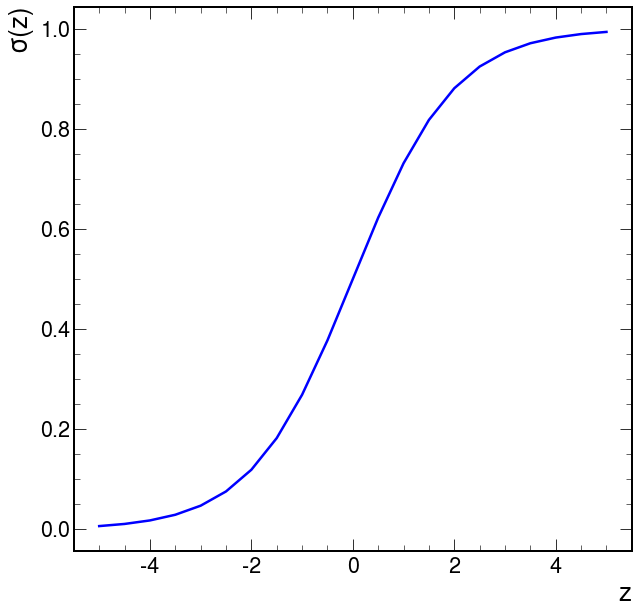

In [6]:
z = np.linspace(-5, 5, 21)
plt.plot(z, sigmoid(z),linewidth=2.5,color='blue')
plt.minorticks_on()
plt.xlabel('$z$')
plt.ylabel(r'$\sigma(z)$')
plt.show()

In [7]:
def BCE(y_true, y_pred):
    '''
    Computes the binary cross entropy
    
    Arguments:
    y_true -- 1 dimensional numpy array with the true labels. Should all be either 0 or 1
    y_pred -- 1 dimensional numpy array containing predictions. Should be continuous between 0 and 1
    
    Return:
    bce -- scalar value
    '''
    
    ### Start code here ### (about 1 line of code)
    bce = -np.mean((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)))
    ### End code here ###
    
    return bce

In [8]:
BCE(np.array([0, 0, 1, 1]), np.array([0.01, 0.99, 0.01, 0.99]))


2.307610260920796

In [9]:
def sigmoid_derivative(z):
    '''
    Compute the gradient of the sigmoid function with respect to its input z.
    It can be useful to store this into a variable later
    
    Arguments:
    z -- A scalar or numpy array
    
    Returns:
    ds -- The computed gradient
    '''
    
    ### Start code here ### (around a few lines of code)
    s = sigmoid(z)
    ds = s * (1 - s)
    ### End code here ####
    
    return ds

In [10]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


In [11]:
def initialize_zeros(dim):
    '''
    This function creates a vecor of zeros with shape (dim, 1) for W.
    It also inializes b to 0
    
    Argument:
    dim -- interger, the size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar for the bias
    '''
    
    ### Start code here ###
    w = np.zeros([dim, 1])
    b = 0.
    ### end code here
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float))
    
    return w, b

In [12]:
dim = 2
w, b = initialize_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [13]:
def propagate(w, b, X, Y):
    '''
    Implement the cost function and its gradient for the propagation above
    
    Arguments:
    w -- weights, a numpy array of size (dim(x[0]), 1)
    b -- bias, a scalar
    X -- data with shape (number of datapoints, dimensionality of the data)
    Y -- true label, vector of 0 or 1
    
    Returns:
    cost -- BCE which is the negative log-likelihhood (cost and loss are used interchangeably)
    dw -- gradient of the loss with respect to w, needs to be the same shape as w
    db -- gradient of the loss with respect to b, needs to be the same shape as b
    
    Tips:
    Write the code step by step and use np.log() and np.dot().
    Print shapes if you need to get the dot products correct.
    '''
    N = X.shape[0]  # number of data points
    
    # Forward propagation (from X to cost)
    ### Start code here ### (around 2 lines of code)
    A = sigmoid(np.dot(X, w) + b)
    cost = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    ### End code here ###
    
    # Backward propogration (to find the gradient)
    ### Start code here ### (around 2 lines of code)
    # Do not use a loop
    dw = np.dot(X.T, (A - Y)) / N
    db = np.mean(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [14]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]).T, np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y.reshape(-1, 1))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [15]:
def optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False, X_val=None, Y_val=None):
    '''
    This function minimizes the BCE loss function by running gradient descent
    
    Arguments:
    w -- weights, a numpy array of size (dim(data), 1)
    b -- bias, a scalar
    X_train -- data of shape (number of samples, dim(data))
    Y_train -- true label of shape (number of samples, 1)
    num_iterations -- number of updates using the gradient, an integer
    learning_rate -- a float which affects the update size
    print_cost -- boolean to print the loss ever 100 steps. Default is False
    X_val -- data of shape (number of samples, dim(data)). Default is None
    Y_val -- true label of shape (number of samples, 1). Default is None
    
    If X_val and Y_val are not None, the loss is computed on the validation data
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    '''
    
    costs = {'train': [],
             'validation': []
            }
    
    for i in range(num_iterations):
        
        # cost and gradient calculation (around 1-4 lines of code)
        ### Start code here ###
        grads, cost = propagate(w, b, X_train, Y_train)
        ### end code here
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Calculate the cost on the validation data
        if (X_val is not None) and (Y_val is not None):
            A_val = sigmoid(np.dot(X_val, w) + b)
            cost_val = -np.mean(Y_val * np.log(A_val) + (1 - Y_val) * np.log(1 - A_val))
            costs['validation'].append(cost_val)
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        costs['train'].append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs
        

In [16]:
params, grads, costs = optimize(w, b, X, Y.reshape(-1, 1), num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


In [17]:
# Initialize w and b
w, b = initialize_zeros(2)

# Optimize
params, grads, costs = optimize(w, b, X_Train, Y_Train,
                                num_iterations= 10000, learning_rate=5e-2,
                                print_cost=False,
                                X_val=X_Val, Y_val=Y_Val
                               )

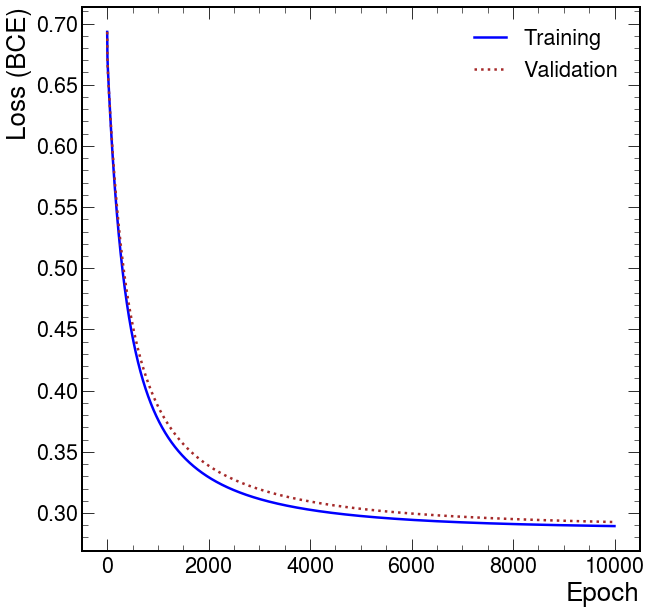

In [18]:
plt.plot(costs['train'], label='Training',linewidth=2.5,color='blue')
plt.plot(costs['validation'], label='Validation', ls=':',linewidth=2.5,color='brown')
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.legend(loc='upper right', frameon=False)
plt.show()

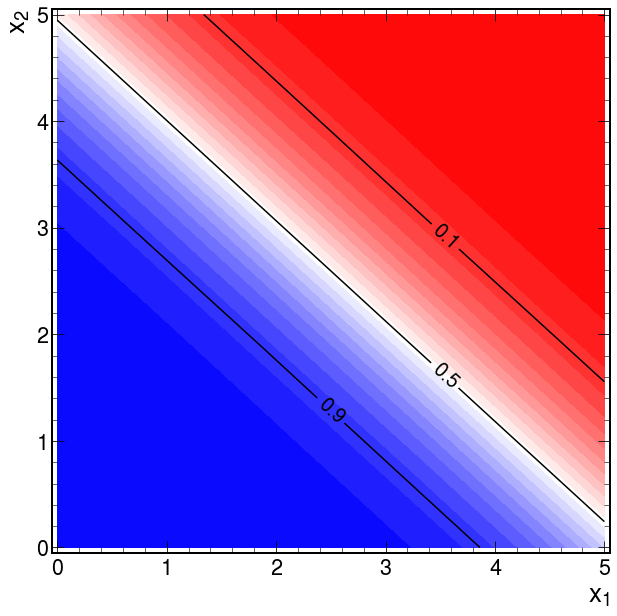

In [19]:
x_space = np.linspace(0, 5, 25)
y_space = np.linspace(0, 5, 25)
X, Y = np.meshgrid(x_space, y_space)
Z = sigmoid(X * params['w'][0] + Y * params['w'][1] + params['b'])  # the 1 - sigmoid just gets the numbering right for the color map below

plt.contourf(X, Y, 1-Z, 25, cmap='bwr')
CS = plt.contour(X, Y, Z, [0.1, 0.5, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=20)
plt.xlim(-0.05, 5.05)
plt.ylim(-0.05, 5.05)
plt.minorticks_on()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

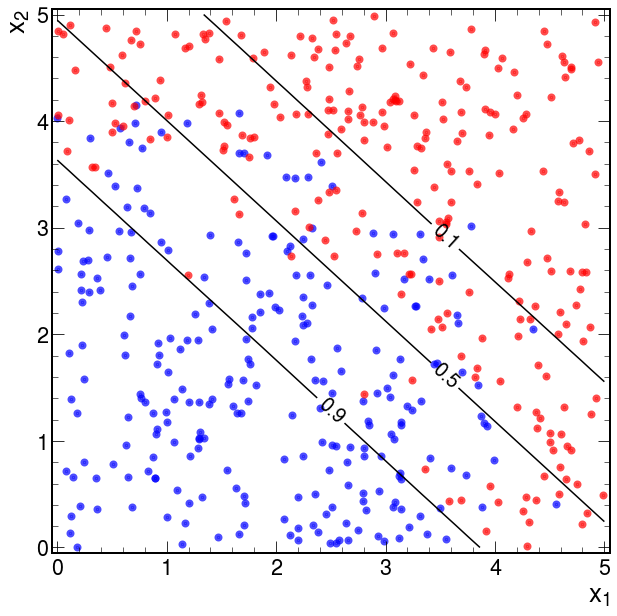

In [20]:
plt.scatter(X_Test[Y_Test.ravel()==1, 0], X_Test[Y_Test.ravel()==1, 1], color='b', s=9, alpha=0.7,linewidths=5)
plt.scatter(X_Test[Y_Test.ravel()==0, 0], X_Test[Y_Test.ravel()==0, 1], color='r', s=9, alpha=0.7,linewidths=5)
CS = plt.contour(X, Y, Z, [0.1, 0.5, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=20)
plt.xlim(-0.05, 5.05)
plt.ylim(-0.05, 5.05)
plt.minorticks_on()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)

In [22]:
X_Quadratic_Train = poly.fit_transform(X_Train)
print(X_Quadratic_Train.shape)

(1000, 5)


In [23]:
X_Quadratic_Test = poly.transform(X_Test)
X_Quadratic_Validatoin = poly.transform(X_Val)

In [24]:
# Initialize w and b
wquad, bquad = initialize_zeros(5)

# Optimize
paramsquad, gradsquad, costsquad = optimize(wquad, bquad,
                                            X_Quadratic_Train, Y_Train,
                                            num_iterations=10000,
                                            learning_rate=5e-2,
                                            print_cost=False,
                                            X_val=X_Quadratic_Validatoin,
                                            Y_val=Y_Val
                                           )

In [25]:
Z = []
for x1 in x_space:
    zs = []
    for x2 in y_space:
        data = poly.transform([[x1, x2]])
        zs.append(float(sigmoid(np.dot(data, paramsquad['w']) + paramsquad['b']).flatten()[0]))
    Z.append(zs)
Z = np.array(Z)

Text(0, 1, '$x_2$')

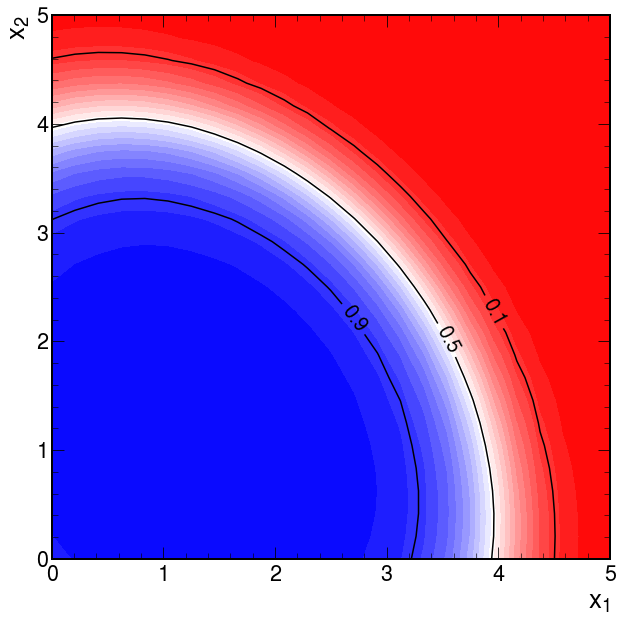

In [26]:
plt.contourf(X, Y, 1-Z, 25, cmap='bwr')
CS = plt.contour(X, Y, Z, [0.1, 0.5, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=20)
plt.xlim(-0.0, 5.0)
plt.ylim(-0.0, 5.0)
plt.minorticks_on()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 1, '$x_2$')

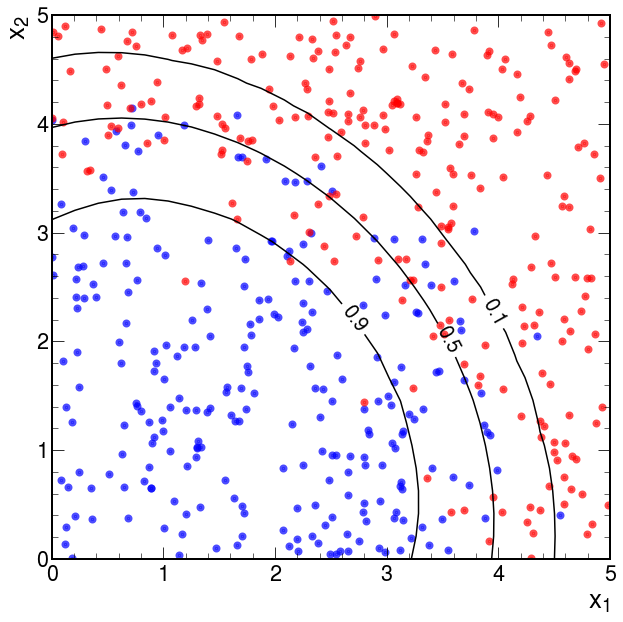

In [27]:
plt.scatter(X_Test[Y_Test.ravel()==1, 0], X_Test[Y_Test.ravel()==1, 1], color='b', s=9, alpha=0.7,linewidths=5)
plt.scatter(X_Test[Y_Test.ravel()==0, 0], X_Test[Y_Test.ravel()==0, 1], color='r', s=9, alpha=0.7,linewidths=5)
CS = plt.contour(X, Y, Z, [0.1, 0.5, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=20)
plt.xlim(-0.0, 5.0)
plt.ylim(-0.0, 5.0)
plt.minorticks_on()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0.5, 1.0, 'Only Linear')

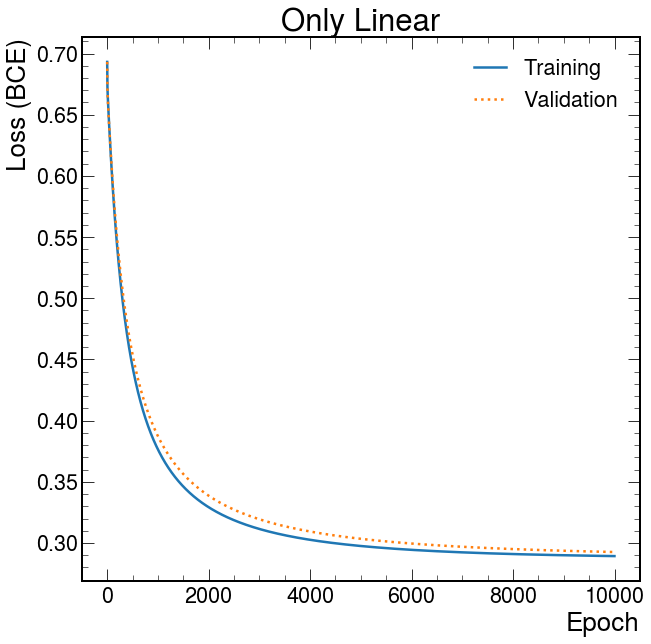

In [28]:
plt.plot(costs['train'], label='Training',linewidth=2.5)
plt.plot(costs['validation'], label='Validation', ls=':',linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.legend(loc='upper right', frameon=False)
plt.title('Only Linear')

Text(0.5, 1.0, 'All Quadratic')

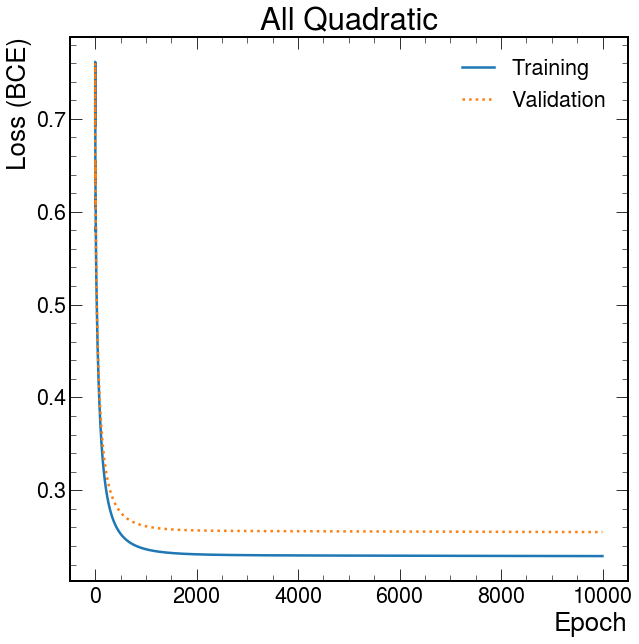

In [29]:
plt.plot(costsquad['train'], label='Training',linewidth=2.5)
plt.plot(costsquad['validation'], label='Validation', ls=':',linewidth=2.5)
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.legend(loc='upper right', frameon=False)
plt.title('All Quadratic')